The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


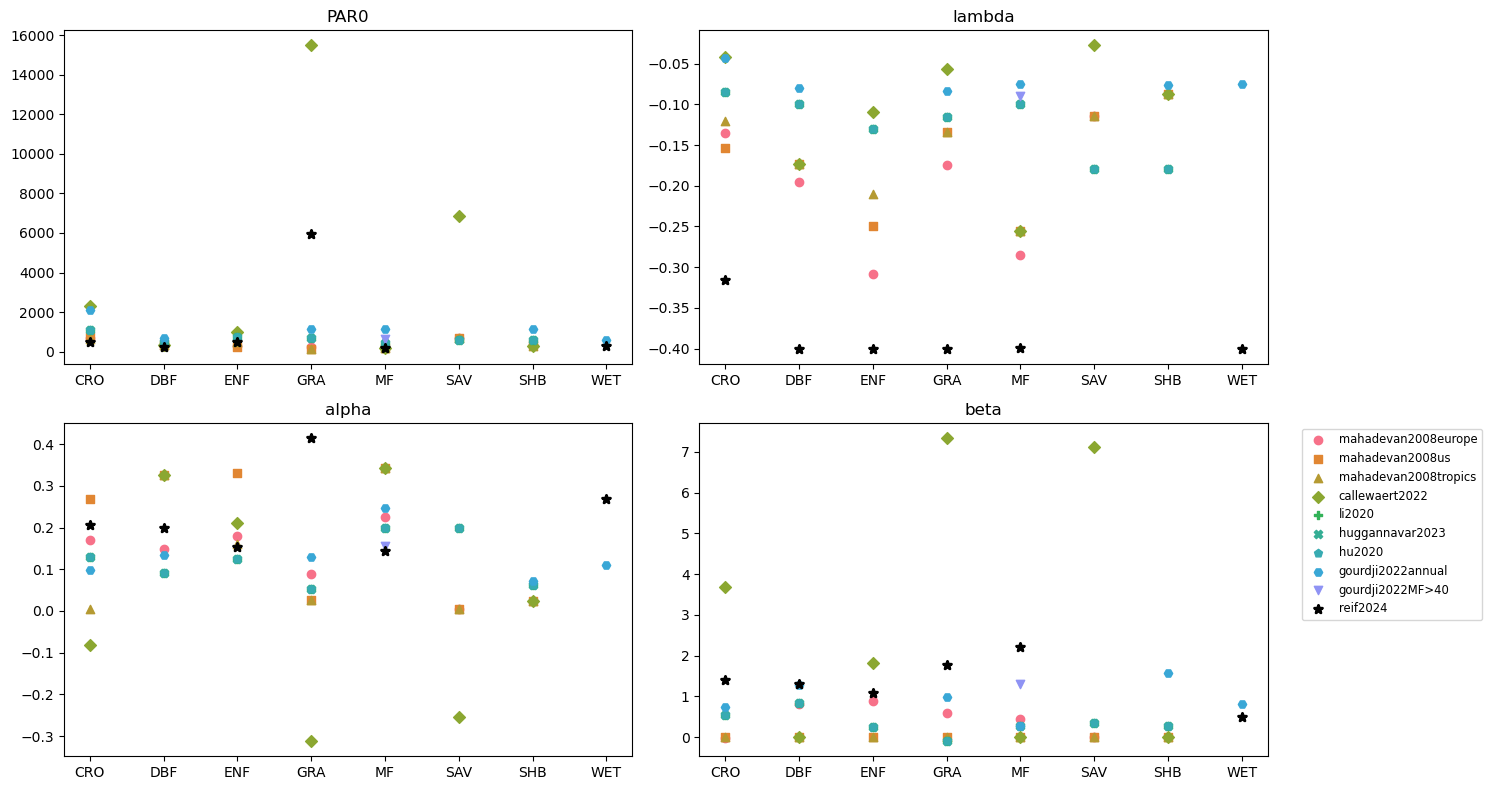

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

VPRM_old_or_new = "old"
run_ID = "diff_evo_V2_101"

with open("VPRM_all_params_literature.csv", "r") as file:
    data = file.read()
tables = data.split("\n\n")

dfs = []
nr_of_tables = 0
for table in tables:
    if not table.strip():  # Skip empty tables
        continue
    df = pd.read_csv(StringIO(table))
    df.set_index(df.columns[0], inplace=True)
    dfs.append(df)
    nr_of_tables += 1

df_tuned = pd.read_csv("parameters_median_old_VPRM_old_optimized_params_"+run_ID+".csv")
df_tuned.drop(index=df_tuned[df_tuned['Parameter'] == 'Topt'].index, inplace=True)
df_tuned['Parameter'] = df_tuned['Parameter'].replace({'lambd': 'lambda'})
df_tuned.loc[df_tuned['Parameter'] == 'lambda', df_tuned.columns != 'Parameter'] *= -1


df_tuned.set_index(df_tuned.columns[0], inplace=True)

params = ['PAR0', 'lambda', 'alpha', 'beta']
colors = sns.color_palette("husl", len(dfs))
markers = ['o', 's', '^', 'D', 'P', 'X', 'p', 'H', 'v']

for df in dfs:
    df.sort_index(axis=1, inplace=True)
df_tuned.sort_index(axis=1, inplace=True)

fig, axes = plt.subplots(2, 2, figsize=(15, 8))  # Increase width of plots

for i, (param, ax) in enumerate(zip(params, axes.flat)):
    for j, (df, marker) in enumerate(zip(dfs, markers)):
        citation_name = df.index.name
        ax.scatter(df.columns, df.loc[param], marker=marker, label=citation_name, color=colors[j])
    
    # Plot df_tuned using thick black horizontal line as a marker
    ax.scatter(df_tuned.columns, df_tuned.loc[param], marker='*', color='black', label='reif2024', linewidth=2)  # Increase linewidth for df_tuned
    
    ax.set_title(param)

# Add a legend on the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.tight_layout()
plt.savefig(
    "compare_params_to_literature_"
    + VPRM_old_or_new
    + "_"
    + run_ID
    + ".eps",
    dpi=300,
    bbox_inches="tight",
)

